Kütüphaneleri içeri aktarma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Veri Toplama ve İşleme

In [2]:
# .csv uzantılı veri setimizi Pandas DataFrame'e yükleme
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# veri çerçevesindeki ilk 5 satırı yazdır
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Veri çerçevesinin son 5 satırını yazdır
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# satır ve sütun sayısını alma
gold_data.shape

(2290, 6)

In [6]:
# veriler hakkında bazı temel bilgileri almak
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# eksik değerlerin sayısını kontrol etme
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# verilerin istatistiksel ölçülerini almak
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Korelasyon:
1. Pozitif Korelasyon
2. Negatif Korelasyon

In [24]:
correlation = gold_data.corr()

<AxesSubplot:>

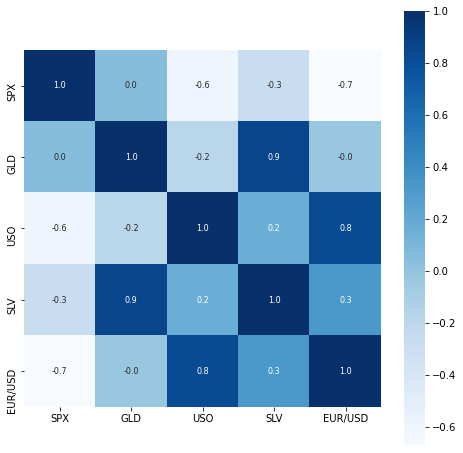

In [10]:
# korelasyonu anlamak için bir ısı haritası oluşturmak
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# GLD'nin korelasyon değerleri
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

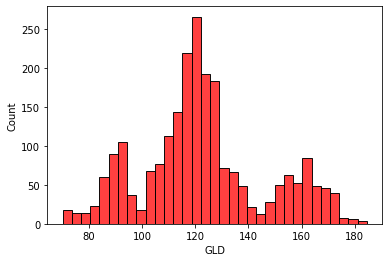

In [35]:
# GLD Fiyatının dağılımının kontrol edilmesi
sns.histplot(gold_data['GLD'],color='red')

Özellikleri ve Hedefi Bölme

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Verilerimizi Eğitim Verileri ve Test Verilerine Bölme İşlemi

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Eğitimi: 
Random Forest Regressor(Rastgele Orman Regrasyonu)

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
# modeli eğitme işlemi
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Değerlendirmesi

In [19]:
# Test Verileri üzerinde tahmin işlemi
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.67549975  81.86509978 115.90240022 127.71870068 120.90840119
 154.77879742 150.32719799 126.02060015 117.48029862 125.97920087
 116.61010085 172.11720091 141.6840993  167.94289878 115.23709988
 117.6388004  138.84200271 170.22330114 159.09940314 157.36869863
 154.84649996 125.03239995 175.2221995  157.0067023  125.13400035
  93.99669984  78.00649998 120.6124     119.10639926 167.49149917
  88.11570043 125.40450024  91.18610053 117.67510047 121.21189853
 135.99140097 115.48330163 115.28370078 147.80039994 107.13740118
 104.10830215  87.27729806 126.38220057 118.09120007 154.74369922
 119.67130032 108.35249983 108.12869772  93.14410024 127.15769744
  75.01770044 113.64999889 121.14299982 111.33319921 118.92179923
 120.97579938 158.30189924 167.8641011  147.3523973   85.93919826
  94.21320022  86.83759872  90.55840023 118.99130081 126.51920071
 127.48760012 169.55590021 122.26399933 117.52439881  98.66809967
 168.32300101 143.24749764 131.90820209 121.14370245 121.01629957
 119.60280

In [21]:
# R kare hata oranı
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R kare hata oranı : ", error_score)

R kare hata oranı :  0.9893606307200276


Bir Grafikte Gerçek Değerleri ve Tahmini Değerleri Karşılaştırma

In [22]:
Y_test = list(Y_test)

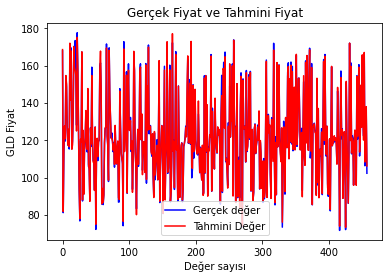

In [38]:
plt.plot(Y_test, color='blue', label = 'Gerçek değer')
plt.plot(test_data_prediction, color='red', label='Tahmini Değer')
plt.title('Gerçek Fiyat ve Tahmini Fiyat')
plt.xlabel('Değer sayısı')
plt.ylabel('GLD Fiyat')
plt.legend()
plt.show()